# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Data Loading

In [2]:
df_calendar = pd.read_csv("./Seattle_Airbnb_Data/calendar.csv")
df_listings = pd.read_csv("./Seattle_Airbnb_Data/listings.csv")
df_reviews = pd.read_csv("./Seattle_Airbnb_Data/reviews.csv")

## Data Sanity Check

In [3]:
# check if there is any duplication in the data sets provided
print("calendar_unique_check:", df_calendar.drop_duplicates().shape == df_calendar.shape)
print("listing_unique_check:", df_listings.drop_duplicates().shape == df_listings.shape)
print("review_unique_check:", df_reviews.drop_duplicates().shape == df_reviews.shape)

calendar_unique_check: True
listing_unique_check: True
review_unique_check: True


In [4]:
# get an idea of the shape of the data sets
print("calendar data shape:", df_calendar.shape)
print("listing data shape:", df_listings.shape)
print("review data shape:", df_reviews.shape)

calendar data shape: (1393570, 4)
listing data shape: (3818, 92)
review data shape: (84849, 6)


In [5]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
# data clean for calendar data
df_calendar['available_bool'] = np.where(df_calendar['available']=='t', True, False)
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
df_calendar[['year', 'month', 'day']] = df_calendar['date'].str.split('-', expand = True)

In [7]:
df_calendar.head()

,listing_id,date,available,price,available_bool,year,month,day
0,241032,2016-01-04,t,85.0,True,2016,01,04
1,241032,2016-01-05,t,85.0,True,2016,01,05
2,241032,2016-01-06,f,NaN,False,2016,01,06
3,241032,2016-01-07,f,NaN,False,2016,01,07
4,241032,2016-01-08,f,NaN,False,2016,01,08


## From time perspective, when is the hot season and the host make most of the money?

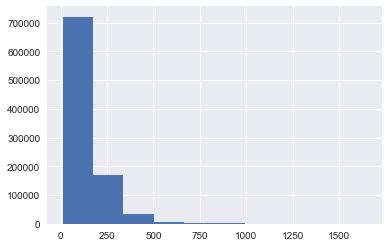

In [8]:
# plot a histgram to have an idea of overall price
a = df_calendar['price'].hist()

In [9]:
# find the basic stats of the price
df_calendar['price'].describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

In [10]:

calendar_stats = df_calendar.groupby("month").agg({"available_bool": ['mean', 'count'], \
                                                   "price": ['mean', "sum"]}).reset_index()
calendar_stats

month available_bool               price            
                   mean   count        mean         sum
0     01       0.566937  114540  122.912176   7981548.0
1     02       0.662208  110722  124.293927   9113355.0
2     03       0.709187  118358  128.644488  10798161.0
3     04       0.663847  114540  135.097005  10272371.0
4     05       0.675670  118358  139.538183  11159008.0
5     06       0.674384  114540  147.473137  11391415.0
6     07       0.627097  118358  152.094150  11288732.0
7     08       0.645051  118358  150.656594  11502179.0
8     09       0.674402  114540  143.255949  11065949.0
9     10       0.696514  118358  137.031939  11296639.0
10    11       0.713986  114540  135.688738  11096625.0
11    12       0.735573  118358  137.251835  11949282.0

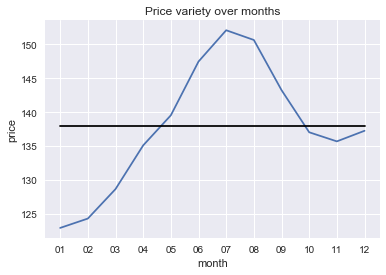

In [11]:
plt.plot(calendar_stats['month'], calendar_stats["price"]["mean"])
plt.plot(calendar_stats['month'], [df_calendar['price'].mean()]*12, 'k-')
plt.xlabel("month")
plt.ylabel("price")
plt.title("Price variety over months")
plt.show()

In [42]:
calendar_stats['month'], calendar_stats["available_bool"]["mean"]

(0     01
 1     02
 2     03
 3     04
 4     05
 5     06
 6     07
 7     08
 8     09
 9     10
 10    11
 11    12
 Name: month, dtype: object, 0     0.566937
 1     0.662208
 2     0.709187
 3     0.663847
 4     0.675670
 5     0.674384
 6     0.627097
 7     0.645051
 8     0.674402
 9     0.696514
 10    0.713986
 11    0.735573
 Name: mean, dtype: float64)

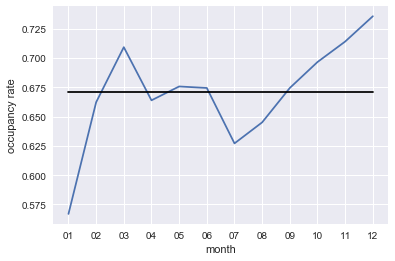

In [12]:
fig, ax = plt.subplots()

ax.plot(calendar_stats['month'], calendar_stats["available_bool"]["mean"])
ax.plot(calendar_stats['month'], [df_calendar["available_bool"].mean()]*12, 'k-')
ax.set_xlabel("month")
ax.set_ylabel("occupancy rate")
# plt.title("Occupanty rate over months")
# plt.show()

# ax2 = ax.twinx()
# ax2.plot(calendar_stats['month'], calendar_stats["available_bool"]["count"], 'red')
# ax2.set_ylabel("listing count")
plt.show()

## From house type persepective, what type of listing is most popular

In [14]:
df_calendar.head()

,listing_id,date,available,price,available_bool,year,month,day
0,241032,2016-01-04,t,85.0,True,2016,01,04
1,241032,2016-01-05,t,85.0,True,2016,01,05
2,241032,2016-01-06,f,NaN,False,2016,01,06
3,241032,2016-01-07,f,NaN,False,2016,01,07
4,241032,2016-01-08,f,NaN,False,2016,01,08


In [15]:
pd.set_option('display.max_columns', None)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [16]:
cols = ['id', 'host_id', 'host_neighborhood', 'host_listing_count', "host_total_listings_count", 'property_type', \
        'accommodates', 'bathrooms','bedrooms','beds']

In [17]:
df_listings_interest = df_listings.filter(cols, axis=1).drop_duplicates().rename(columns={"id": "listing_id"})
df_listings_interest.head()

,listing_id,host_id,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds
0,241032,956883,3.0,Apartment,4,1.0,1.0,1.0
1,953595,5177328,6.0,Apartment,4,1.0,1.0,1.0
2,3308979,16708587,2.0,House,11,4.5,5.0,7.0
3,7421966,9851441,1.0,Apartment,3,1.0,0.0,2.0
4,278830,1452570,2.0,House,6,2.0,3.0,3.0


In [18]:
host_stats = df_listings_interest.groupby("host_id")["listing_id"].nunique().reset_index()\
.sort_values(by = 'listing_id', ascending = False).reset_index().rename(columns={"listing_id": "listing_counts"})
host_stats['listing_cumsum'] = host_stats['listing_counts'].cumsum()
total_listing = host_stats.listing_counts.sum()
host_stats['listing_cumsum_pct']=host_stats['listing_cumsum']/(host_stats.listing_counts.sum())

## Does the biggest host has more listing

In [19]:
host_stats = df_listings_interest.groupby("host_id")["listing_id"].nunique().reset_index()\
.sort_values(by = 'listing_id', ascending = False).reset_index().rename(columns={"listing_id": "listing_counts"})
host_stats['listing_cumsum'] = host_stats['listing_counts'].cumsum()
total_listing = host_stats.listing_counts.sum()
host_stats['listing_cumsum_pct']=host_stats['listing_cumsum']/(host_stats.listing_counts.sum())
print(total_listing)
host_stats.head(10)

3818


,index,host_id,listing_counts,listing_cumsum,listing_cumsum_pct
0,1045,8534462,46,46,0.012048
1,730,4962900,39,85,0.022263
2,278,1243056,37,122,0.031954
3,131,430709,36,158,0.041383
4,539,3074414,34,192,0.050288
5,30,74305,33,225,0.058931
6,2020,26967583,21,246,0.064432
7,958,7354306,18,264,0.069146
8,2513,42537846,16,280,0.073337
9,177,658155,12,292,0.076480


In [20]:
host_stats.describe()

,index,host_id,listing_counts,listing_cumsum,listing_cumsum_pct
count,2751.00000,2.751000e+03,2751.000000,2751.000000,2751.000000
mean,1375.00000,1.756066e+07,1.387859,2396.189022,0.627603
std,794.28962,1.490073e+07,2.002649,874.489500,0.229044
min,0.00000,4.193000e+03,1.000000,46.000000,0.012048
25%,687.50000,4.355431e+06,1.000000,1755.500000,0.459796
50%,1375.00000,1.337016e+07,1.000000,2443.000000,0.639864
75%,2062.50000,2.834014e+07,1.000000,3130.500000,0.819932
max,2750.00000,5.320861e+07,46.000000,3818.000000,1.000000


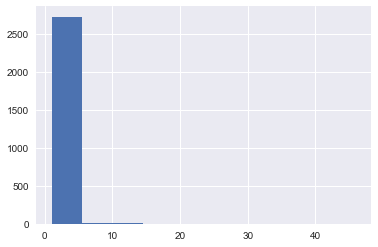

In [21]:
host_stats.listing_counts.hist()

Airbnb is more related to small businesses, with majority of the hosts only have 1 listing, with 8 bigger host each has at least 16 listing and take 7% of the market in total. 

## price related to house type

In [22]:
df_calendar.head()

,listing_id,date,available,price,available_bool,year,month,day
0,241032,2016-01-04,t,85.0,True,2016,01,04
1,241032,2016-01-05,t,85.0,True,2016,01,05
2,241032,2016-01-06,f,NaN,False,2016,01,06
3,241032,2016-01-07,f,NaN,False,2016,01,07
4,241032,2016-01-08,f,NaN,False,2016,01,08


In [23]:
df_calendar_listings = pd.merge(df_calendar, df_listings_interest, how = 'left', on = 'listing_id')
df_calendar_listings.head()

,listing_id,date,available,price,available_bool,year,month,day,host_id,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds
0,241032,2016-01-04,t,85.0,True,2016,01,04,956883,3.0,Apartment,4,1.0,1.0,1.0
1,241032,2016-01-05,t,85.0,True,2016,01,05,956883,3.0,Apartment,4,1.0,1.0,1.0
2,241032,2016-01-06,f,NaN,False,2016,01,06,956883,3.0,Apartment,4,1.0,1.0,1.0
3,241032,2016-01-07,f,NaN,False,2016,01,07,956883,3.0,Apartment,4,1.0,1.0,1.0
4,241032,2016-01-08,f,NaN,False,2016,01,08,956883,3.0,Apartment,4,1.0,1.0,1.0


In [24]:
df_listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [25]:
df_calendar_listings.groupby('property_type')['property_type'].count()

property_type
Apartment          623420
Bed & Breakfast     13505
Boat                 2920
Bungalow             4745
Cabin                7665
Camper/RV            4745
Chalet                730
Condominium         33215
Dorm                  730
House              632545
Loft                14600
Other                8030
Tent                 1825
Townhouse           43070
Treehouse            1095
Yurt                  365
Name: property_type, dtype: int64

In [27]:
df_calendar_listings.head()

,listing_id,date,available,price,available_bool,year,month,day,host_id,host_total_listings_count,property_type,accommodates,bathrooms,bedrooms,beds
0,241032,2016-01-04,t,85.0,True,2016,01,04,956883,3.0,Apartment,4,1.0,1.0,1.0
1,241032,2016-01-05,t,85.0,True,2016,01,05,956883,3.0,Apartment,4,1.0,1.0,1.0
2,241032,2016-01-06,f,NaN,False,2016,01,06,956883,3.0,Apartment,4,1.0,1.0,1.0
3,241032,2016-01-07,f,NaN,False,2016,01,07,956883,3.0,Apartment,4,1.0,1.0,1.0
4,241032,2016-01-08,f,NaN,False,2016,01,08,956883,3.0,Apartment,4,1.0,1.0,1.0


In [28]:
df_house_interesting = df_calendar_listings[df_calendar_listings['available_bool']==True]

In [29]:
house_stats = df_house_interesting.groupby("property_type").agg({"price": ['mean', 'median','max', 'min','count']}).reset_index()
house_stats

property_type       price                              
                           mean median     max    min   count
0         Apartment  139.285106  120.0   939.0   12.0  407603
1   Bed & Breakfast  116.048976   98.0   420.0   26.0    9862
2              Boat  330.618901  150.0   775.0   75.0    2275
3          Bungalow  124.330813   95.0   500.0   53.0    3307
4             Cabin  114.292208  100.0   350.0   40.0    5082
5         Camper/RV  126.931055   99.0   375.0   42.0    3423
6            Chalet   93.509009   62.0   135.0   62.0     666
7       Condominium  169.646416  149.0   800.0   41.0   19226
8              Dorm   39.384977   38.0    47.0   38.0     426
9             House  136.627935   95.0  1650.0   10.0  436641
10             Loft  133.465979  100.0   450.0   25.0    9891
11            Other  106.402906   90.0   272.0   35.0    6952
12             Tent   57.540046   65.0    65.0   25.0     874
13        Townhouse  133.011563   90.0   901.0   28.0   27155
14        Treehouse   64.346211   48.0   200.0   48.0     673
15             Yurt  105.423729  100.0   120.0  100.0     177

[Text(0,0,'Apartment'),
 Text(0,0,'House'),
 Text(0,0,'Cabin'),
 Text(0,0,'Condominium'),
 Text(0,0,'Camper/RV'),
 Text(0,0,'Bungalow'),
 Text(0,0,'Townhouse'),
 Text(0,0,'Loft'),
 Text(0,0,'Boat'),
 Text(0,0,'Bed & Breakfast'),
 Text(0,0,'Other'),
 Text(0,0,'Dorm'),
 Text(0,0,'Treehouse'),
 Text(0,0,'Yurt'),
 Text(0,0,'Chalet'),
 Text(0,0,'Tent')]

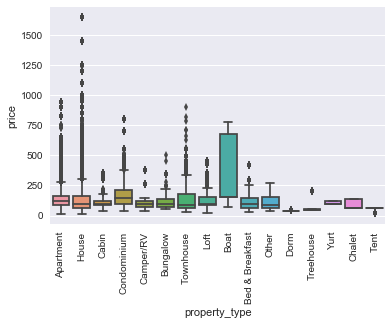

In [38]:

ax3 = sns.boxplot(x='property_type', y='price', data=df_house_interesting)
ax3.set_xticklabels(ax.get_xticklabels(),rotation=90)
# x = 'property_types'
# plt.xticks(x, labels)
# plt.xticks('property_type', labels, rotation='vertical')
